<a href="https://colab.research.google.com/github/1sazzad/PyTorch/blob/main/Simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# Create a Model class that inherits nn.Module
class Model(nn.Module):
  # Input Layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # Output Layer (3 classes of the flower)

  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

    # Forward propagation
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [3]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [6]:
# # Change last column from string to integers
# my_df['variety'] = my_df['variety'].replace('Setosa',0.0)
# my_df['variety'] = my_df['variety'].replace('versicolor',1.0)
# my_df['variety'] = my_df['variety'].replace('verginica',2.0)
# my_df


# Change last column from strings to integers
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

<ipython-input-6-7e781604ec79>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [7]:
# Train Test Split Set x,y
x = my_df.drop('variety', axis = 1)
y = my_df['variety']

In [8]:
# Convert this too numpy arrays
x = x.values
y = y.values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

In [11]:
# Convert x features to float tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

In [12]:
# print(type(y_train), y_train.dtype)
# print(type(y_test), y_test.dtype)


In [13]:
# y_train = y_train.astype(int)  # or .astype(np.int64)
# y_test = y_test.astype(int)


In [14]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [15]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Chose adam optimizer, lr = learning rate(if error doesn't go down after a bunch of iterations(epoech), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [16]:
# Train our model!
# Epoch?(one run thru all the learining data in our  network)
epochs = 100
losses = []
for i in range(epochs):
  # go forward and get a prediction
  y_pred = model.forward(x_train) # get predict results

  # measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # keep track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i%10 == 0:
    print(f'Epoch: {i} Loss: {loss}')

    # Do some back propagation: take error rate of forward propagation and feed it back thru the network to fine tune the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


# # Train our model!
# # Epochs? (one run thru all the training data in our network)
# epochs = 100
# losses = []
# for i in range(epochs):
#   # Go forward and get a prediction
#   y_pred = model.forward(x_train) # Get predicted results

#   # Measure the loss/error, gonna be high at first
#   loss = criterion(y_pred, y_train) # predicted values vs the y_train

#   # Keep Track of our losses
#   losses.append(loss.detach().numpy())

#   # print every 10 epoch
#   if i % 10 == 0:
#     print(f'Epoch: {i} and loss: {loss}')

#   # Do some back propagation: take the error rate of forward propagation and feed it back
#   # thru the network to fine tune the weights
#   optimizer.zero_grad()
#   loss.backward()
#   optimizer.step()


Epoch: 0 Loss: 1.125203251838684
Epoch: 10 Loss: 1.1095693111419678
Epoch: 20 Loss: 1.0961166620254517
Epoch: 30 Loss: 1.0845798254013062
Epoch: 40 Loss: 1.0739582777023315
Epoch: 50 Loss: 1.0637890100479126
Epoch: 60 Loss: 1.0539253950119019
Epoch: 70 Loss: 1.0440940856933594
Epoch: 80 Loss: 1.0337880849838257
Epoch: 90 Loss: 1.022811770439148


Text(0.5, 0, 'Epoch')

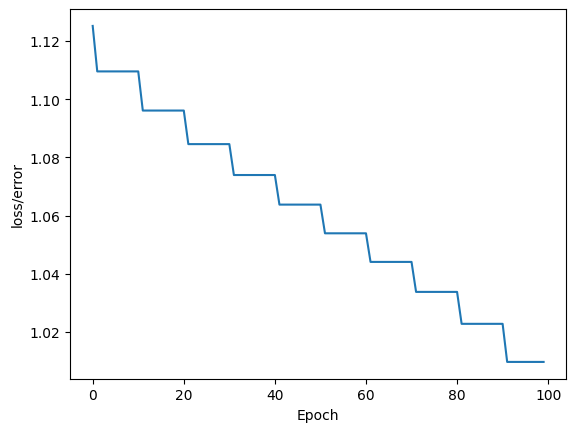

In [17]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [18]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():  # Basically turn off back propogation
  y_eval = model.forward(x_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error


In [19]:
loss

tensor(1.0119)

In [22]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(x_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'


    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t\t {x} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.)  tensor([0.0828, 0.2474, 0.4371]) 		 Virginica 	 2
2.)  tensor([0.0608, 0.2200, 0.5882]) 		 Virginica 	 2
3.)  tensor([0.0192, 0.2061, 0.7187]) 		 Virginica 	 2
4.)  tensor([0.0914, 0.2466, 0.4340]) 		 Versicolor 	 2
5.)  tensor([0.0436, 0.2227, 0.6060]) 		 Virginica 	 2
6.)  tensor([0.1031, 0.2560, 0.3943]) 		 Versicolor 	 2
7.)  tensor([0.0629, 0.2417, 0.4988]) 		 Virginica 	 2
8.)  tensor([0.0832, 0.2444, 0.4551]) 		 Versicolor 	 2
9.)  tensor([0.0514, 0.2310, 0.5581]) 		 Virginica 	 2
10.)  tensor([0.0457, 0.2079, 0.6628]) 		 Virginica 	 2
11.)  tensor([0.0673, 0.2401, 0.4928]) 		 Virginica 	 2
12.)  tensor([0.2033, 0.2958, 0.1126]) 		 Setosa 	 1
13.)  tensor([0.2103, 0.3077, 0.0444]) 		 Setosa 	 1
14.)  tensor([0.1358, 0.2799, 0.2410]) 		 Versicolor 	 1
15.)  tensor([0.1838, 0.2927, 0.1522]) 		 Setosa 	 1
16.)  tensor([0.0780, 0.2399, 0.4747]) 		 Virginica 	 2
17.)  tensor([0.2039, 0.2997, 0.0876]) 		 Setosa 	 1
18.)  tensor([0.0781, 0.2412, 0.4648]) 		 Versicolor 	 2
19.)  te